# Разработка моделей машинного обучения.

![Превью](../docs/model_dev.png)

## Оглавление.

* ### [Введение](#Введение.)
* ### [Описание данных](#Описание-данных.)
* ### [Импорт библиотек](#Импорт-библиотек.)
* ### [Исследование данных](#Исследование-данных.)
  * #### [Целевые переменные](#Целевые-переменные.)
  * #### [Уникальные значения](#Уникальные-значения.)
  * #### [Линейная взаимосвязь признаков](#Линейная-взаимосвязь-признаков.)
* ### [Подготовка данных для обучения](#Подготовка-данных-для-обучения.)
* ### [Разработка Score-модели](#Разработка-Score-модели.)
  * #### [Регресионная модель](#Регресионная-модель.)
    * #### [Linear Regression](#Linear-Regression.)
    * #### [RANSAC](#RANSAC.)
    * #### [Ridge](#Ridge.)
  * #### [Ансамблеевое обучение](#Ансамблеевое-обучение.)
    * #### [RandomForest](#RandomForest.)
    * #### [GradientBoostingRegressor](#GradientBoostingRegressor.)
* ### [Итоги разработки Score-модели](#Итоги-разработки-Score-модели.)
* ### [Разработка PS-модели](#Разработка-PS-модели.)
    * #### [LogisticRegression](#LogisticRegression.)
    * #### [SVM](#SVM.)
    * #### [RandomForestClassifier](#RandomForestClassifier.)
    * #### [ROC-кривые](#ROC-кривые.)
* ### [Итоги разработки PS-модели](#Итоги-разработки-PS-модели.)
* ### [Импорт модели](#Импорт-модели.)

## Введение.

В данном нотбуке произведена работа по *разработке прогнозирующей и класификационной модели.*


* **Score-модель:** модель, **прогнозирующая рейтинг аниме.**


* **PS-модель (Probability Success):** модель, **предсказывающая успех/провал аниме.**

## Описание данных.

В нашем датасете представлена следующая информация:

 * **name_eng -** название аниме на английском.
 
 
 * **rating -** возрастной рейтинг аниме:
    * **0 -** R+ *(сексуальные сцены, просмотр от 21 года).*
    * **1 -** R *(зрители до 17 лет должны присутствовать в зале с сопровождением родителей).*
    * **2 -** PG-13 *(детям до 13 просмотр не желателен).*
    * **3 -** PG *(кино разрешённое для просмотра всем, но маленьким детям рекомендуется просмотр с родителями).*
    * **4 -** G *(без всяких возрастных ограничений).*
    * **5 -** RX (*на сеанс не допускаются лица, не достигшие 17-летнего возраста).*
    * **6 -** Рейтинг не определён.
    

 * **studio -** номер студии(узнать номер студии можно в скрипте **Обработка данных.ipynb**).
 
 
 * **kind -** тип аниме:
     * **Cериал:** 0
     * **Полнометражка:** 1
     * **OVA (особый формат аниме-сериала):** 2
     * **Спешл-серия:** 3
     * **ONA ():** 4
     * **Музыкальный клип:** 5
     * **Тип аниме не определён:** 6
     
     
  * **main_genre/secondary_genre -** основной/второстепенный жанр аниме:
     * **Жанр отсутствует:** -1 (только для **secondary_genre**).
     * **Самураи:** 0
     * **Космос:** 1
     * **Cила:** 2
     * **Драма:** 3
     * **Машины:** 4
     * **Игры:** 5
     * **Меха:** 6
     * **Военное:** 7
     * **Хентай:** 8
     * **Повседневность:** 9
     * **Детское:** 10
     * **Детектив:** 11
     * **Безумие:** 12
     * **Экшен:** 13
     * **Сёдзё-ай:** 14
     * **Триллер:** 15
     * **Искусство:** 16
     * **Этти:** 17
     * **Школа:** 18
     * **Гурман:** 19
     * **Вампиры:** 20
     * **Супер:** 21
     * **Пародия:** 22
     * **Демоны:** 23
     * **Спорт:** 24
     * **Магия:** 25
     * **Работа:** 26
     * **Романтика:** 27
     * **Сёнен-ай:** 28
     * **Приключения:** 29
     * **Фантастика:** 30
     * **Сёдзё:** 31
     * **Сэйнэн:** 32
     * **Фэнтези:** 33
     * **Полиция:** 34
     * **Психологическое:** 35
     * **Исторический:** 36
     * **Сёнен:** 37
     * **Боевые:** 38
     * **Ужасы:** 39
     * **Дзёсей:** 40
     * **Юри:** 41
     * **Сверхъестественное:** 42
     * **Яой:** 43
     * **Эротика:** 44
     * **Музыка:** 45
     * **Комедия:** 46
     * **Гарем:** 47
     
     
* **year -** год выпуска аниме.


* **quarter -** квартал выпуска аниме:
     * **1-ый квартал:** 1
     * **2-ой квартал:** 2
     * **3-ий кватрал:** 3
     * **4-ый квартал:** 4
     
     
     
* **status -** текущий статус аниме:
    * **Завершено:** 0
    * **Выходит:** 1
    
    
* **total_episodes -** количество запланированных эпизодов.


* **episodes_aired -** количество выпущенных эпизодов.


* **duration_min -** продолжительность эпизода в минутах.


* **positive_count_r -** количество положительных оценок (в данном случае, все оценки от 7 до 10 звёзд включительно).


* **negative_count_r -** количество негативных оценок (в данном случае, все оценки от 1 до 6 звезды включительно).


* **planned -** количество пользователей, планирующие посмотреть это аниме.


* **score -** оценка аниме, является **целевой переменной** для прогнозирования.


* **success -** успешность аниме, является **целевой переменной** для бинарной классификации.

## Импорт библиотек.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pickle
import os

from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, RANSACRegressor, Ridge
from sklearn.svm import SVC # Метод опорных векторов.
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('../data/clean_anime_data.csv')
df.head(3)

,name_eng,rating,studio,kind,main_genre,secondary_genre,year,quarter,status,total_episodes,episodes_aired,duration_min,positive_count_r,negative_count_r,planned,score,success
0,Cowboy Bebop,0,0,0,13,29,1998,2,0,26,0,24,43191,2235,37941,8.77,1
1,Cowboy Bebop: Tengoku no Tobira,1,1,1,13,3,2001,3,0,1,0,115,13701,836,11998,8.38,1
2,Trigun,2,2,0,37,13,1998,2,0,26,0,24,20156,1620,25542,8.22,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13437 entries, 0 to 13436
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name_eng          13437 non-null  object 
 1   rating            13437 non-null  int64  
 2   studio            13437 non-null  int64  
 3   kind              13437 non-null  int64  
 4   main_genre        13437 non-null  int64  
 5   secondary_genre   13437 non-null  int64  
 6   year              13437 non-null  int64  
 7   quarter           13437 non-null  int64  
 8   status            13437 non-null  int64  
 9   total_episodes    13437 non-null  int64  
 10  episodes_aired    13437 non-null  int64  
 11  duration_min      13437 non-null  int64  
 12  positive_count_r  13437 non-null  int64  
 13  negative_count_r  13437 non-null  int64  
 14  planned           13437 non-null  int64  
 15  score             13437 non-null  float64
 16  success           13437 non-null  int64 

## Исследование данных.

Прежде чем приступить к обучению моделей, я бы хотел посмотреть, как устроены мои данные.

### Целевые переменные.

<AxesSubplot:>

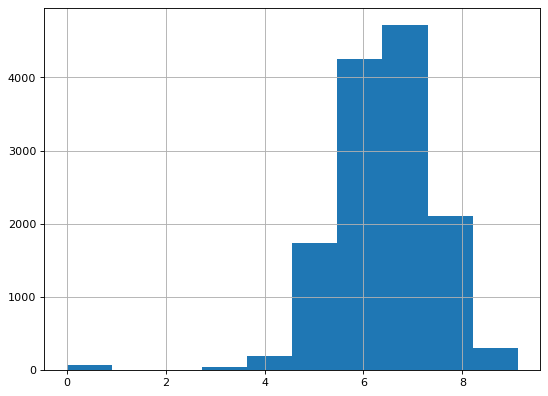

In [4]:
"""score"""
# Взглянем на распределение.
figure(figsize=(8, 6), dpi=80)
df['score'].hist()

Если убрать данные от 0 до 2, то наше распределение будет похожим на **нормальное**. В целом, это гипотезу можно проверить с помощью **критерия Шапиро-Уилка**, но я не вижу в этом необходимости.

<AxesSubplot:>

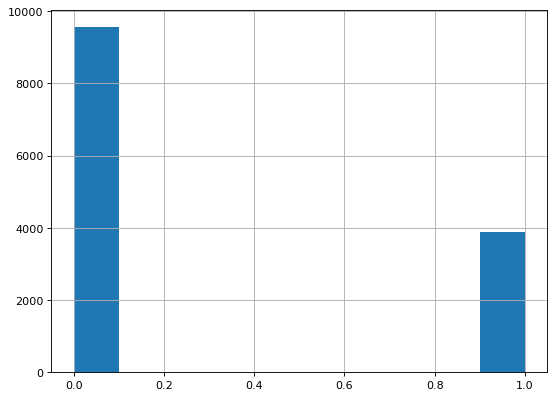

In [5]:
"""success"""
# Взглянем на распределение.
figure(figsize=(8, 6), dpi=80)
df['success'].hist()

In [6]:
df['success'].unique()

array([1, 0], dtype=int64)

Очевидно наблюдается **дисбаланс классов.** Для оценки качества класификационной модели использовать метрику **accuracy** - будет глупо.

Поэтому оценивать качество работы нашей модели мы будем с помощью **ROC_AUC**, которая покажет нам **насколько хорошо наша модель различает 2 класса**.

### Уникальные значения.

Сейчас мы взглянем какие уникальные значения хранят некоторые признаки и в каком количестве.

In [7]:
# Продолжительность эпизода.
print(f"Уникальные значения длинны: {len(df['duration_min'].unique())}")
print(f"\nСписок уникальные значений и их количество:")
df['duration_min'].value_counts()[:10]

Уникальные значения длинны: 151

Список уникальные значений и их количество:


24    1967
23    1328
25     868
3      735
4      571
2      566
1      496
5      469
30     377
28     341
Name: duration_min, dtype: int64

In [8]:
# Тип аниме.
df['kind'].value_counts()

0    4056
2    3069
1    2216
3    1823
4    1341
5     931
6       1
Name: kind, dtype: int64

In [9]:
# Статус аниме.
df['status'].value_counts()

0    13323
1      114
Name: status, dtype: int64

In [10]:
# Сколько аниме выпустили по годам.
print(f"Год самого старого аниме: {df['year'].min()}")
print(f"Год самого нового аниме: {df['year'].max()}")
print(f"\nСписок уникальные значений и их количество:")
df['year'].value_counts()[:35]

Год самого старого аниме: 1917
Год самого нового аниме: 2022

Список уникальные значений и их количество:


2016    722
2017    707
2018    691
2014    682
2015    629
2012    601
2013    595
2019    584
2011    550
2020    500
2010    475
2009    444
2006    400
2008    391
2007    389
2005    350
2004    334
2003    312
2001    301
2002    300
2021    220
1999    201
2000    189
1998    171
1996    156
1997    152
1994    142
1995    139
1992    137
1993    130
1989    129
1991    129
1987    125
1990    124
1988    119
Name: year, dtype: int64

<AxesSubplot:>

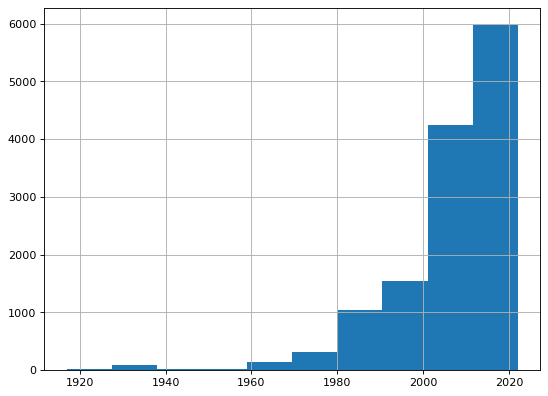

In [11]:
figure(figsize=(8, 6), dpi=80)
df['year'].hist()

In [12]:
# Главный жанр аниме.
print(f"Уникальные значения: {len(df['main_genre'].unique())}")
print(f"\nСписок уникальные значений и их количество:")
df['main_genre'].value_counts()

Уникальные значения: 44

Список уникальные значений и их количество:


13    2168
46    2077
37    1735
8     1050
10     874
32     756
29     732
45     671
3      656
31     609
33     385
12     370
9      223
30     195
27     131
39      93
40      89
11      80
42      78
24      66
28      64
36      50
17      44
5       40
43      28
7       23
41      23
6       19
25      16
22      16
35      13
4       11
18      11
14       9
47       6
19       5
1        5
23       4
20       3
15       2
38       2
44       2
0        2
21       1
Name: main_genre, dtype: int64

<AxesSubplot:>

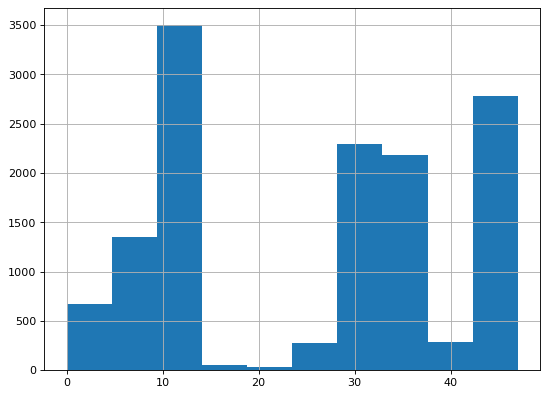

In [13]:
figure(figsize=(8, 6), dpi=80)
df['main_genre'].hist()

In [14]:
# Второстепенный жанр аниме.
print(f"Уникальные значения: {len(df['secondary_genre'].unique())}")
print(f"\nСписок уникальные значений и их количество:")
df['secondary_genre'].value_counts()

Уникальные значения: 44

Список уникальные значений и их количество:


-1     3128
 46    1737
 13    1320
 29    1158
 33     869
 3      845
 30     662
 27     588
 45     519
 9      508
 42     216
 11     195
 18     174
 36     170
 22     149
 24     146
 39     145
 6      138
 8      136
 17     104
 5       68
 47      45
 7       44
 19      43
 23      41
 14      40
 35      39
 38      29
 21      26
 1       25
 28      23
 15      22
 12      18
 4       18
 0       16
 34       9
 41       7
 20       6
 25       3
 37       2
 43       2
 16       2
 44       1
 2        1
Name: secondary_genre, dtype: int64

<AxesSubplot:>

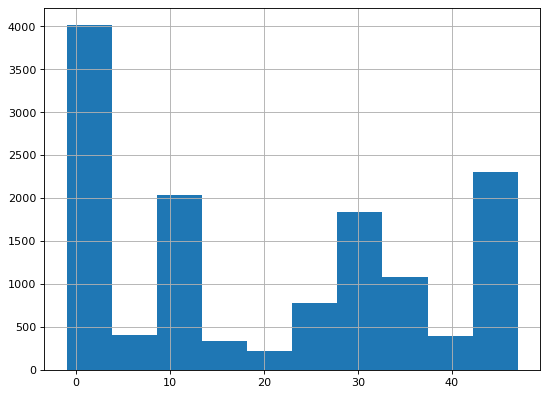

In [15]:
figure(figsize=(8, 6), dpi=80)
df['secondary_genre'].hist()

### Линейная взаимосвязь признаков.

Теперь я бы хотел посмотреть визуально, имеется ли у нас корреляция между признаками. 

Признаков у нас много и смотреть на то как они коррелируют с целевой переменной **score** смысла нет, нужно выбрать непрерывные целевые значения, а именно:
   * **duration_min**
   * **positive_count_r**
   * **negative_count_r**
   * **planned**

[]

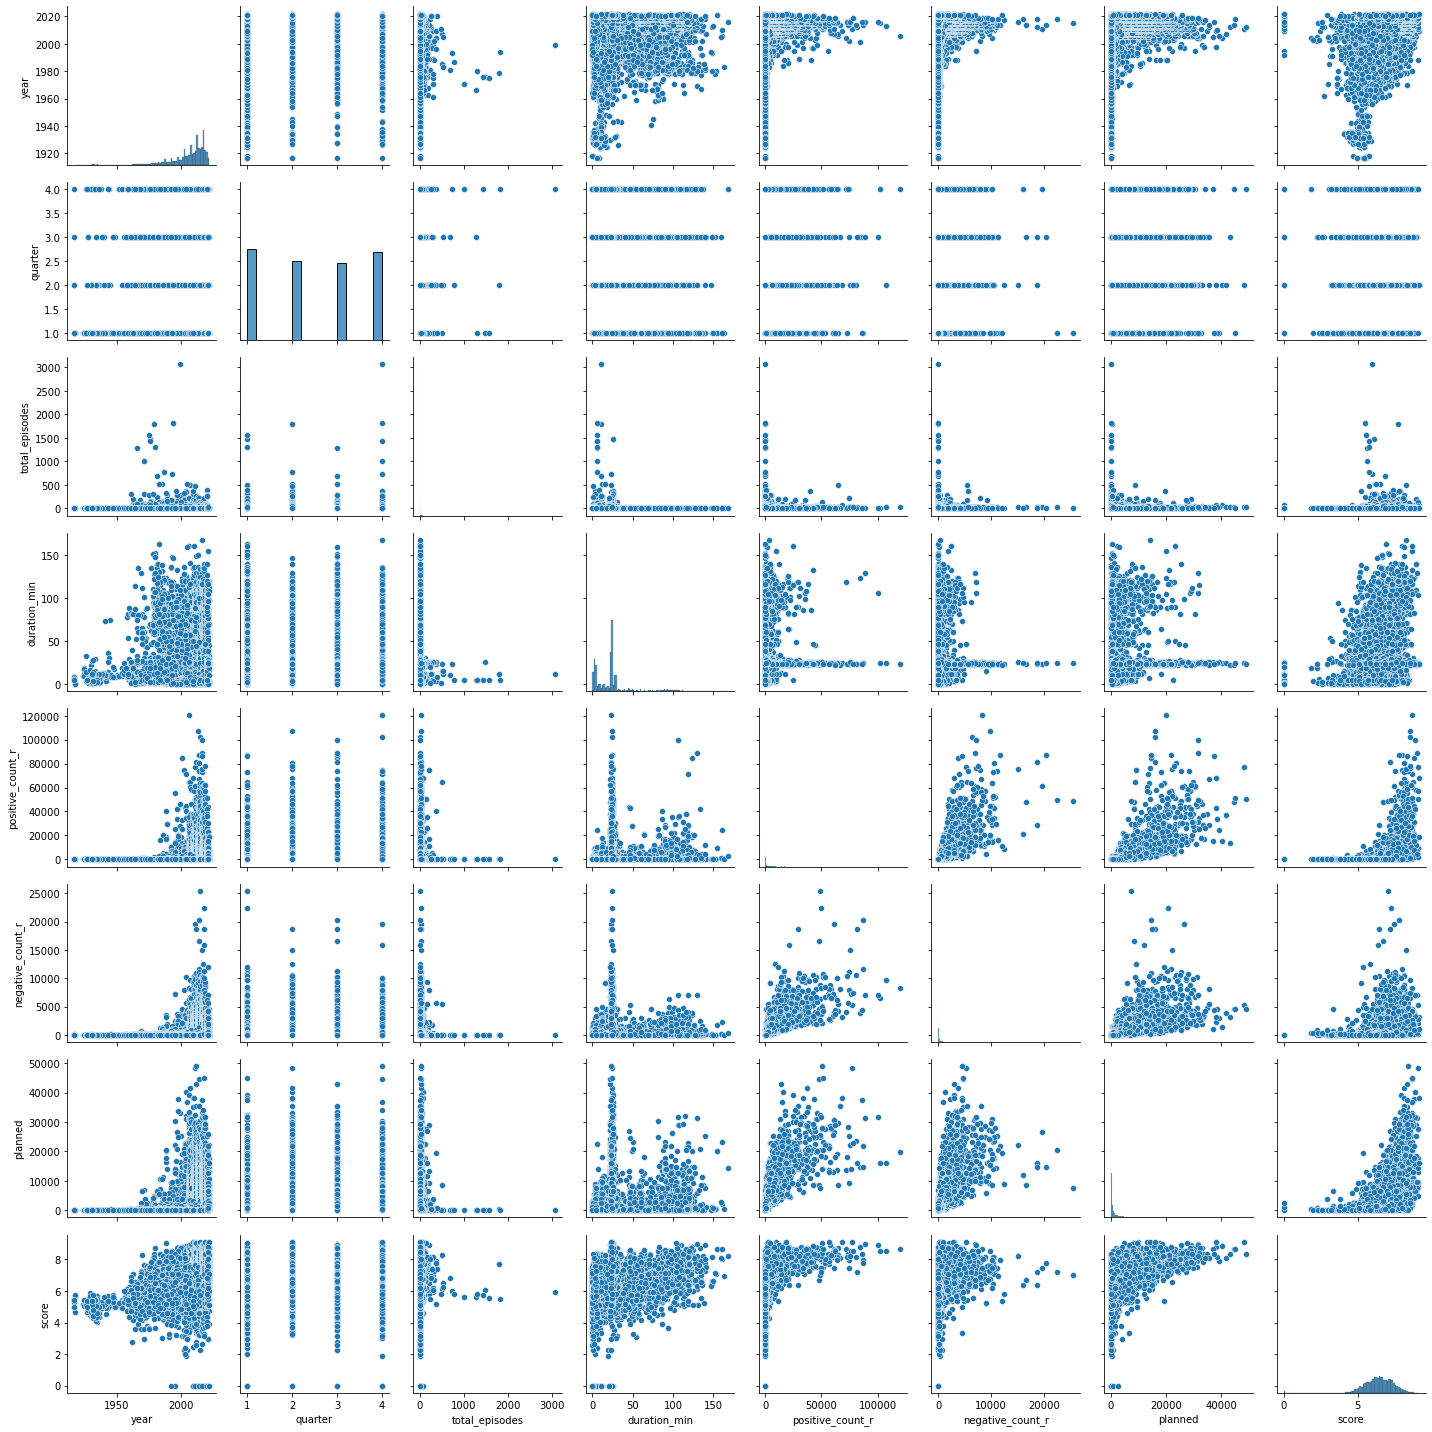

In [16]:
corr_cols = ['year', 'quarter', 'total_episodes', 'duration_min', 'positive_count_r', 'negative_count_r', 'planned', 'score']
sns.pairplot(df[corr_cols], height=2.5)
plt.tight_layout()
plt.plot()

<div class="alert alert-info" role="alert">
    Исходя из графиков, мы видим, что некая взаимосвязь у нас присутствует, но <b>весьма слабая,</b> дополнительно построим <b>корреляционную матрицу.</b>
</div>

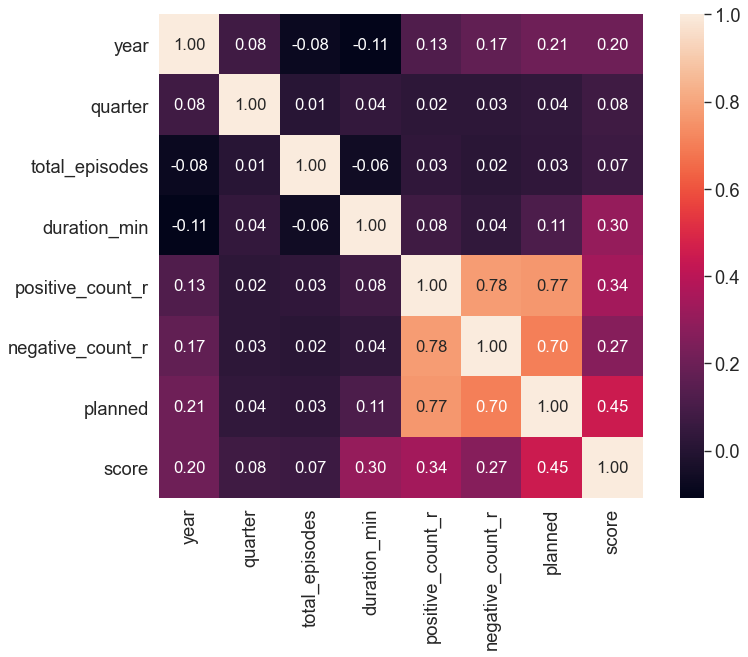

In [17]:
cm = np.corrcoef(df[corr_cols].values.T)
sns.set(font_scale=1.5)
figure(figsize=(12, 8), dpi=80)

hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=corr_cols,
                 xticklabels=corr_cols)
plt.show()

<div class="alert alert-info" role="alert">
    Коэффиценты корреляции действительно <b>низкие.</b><br>
    Если мы построим <b>линейную регресионную модель,</b> то результат не увенчается успехом, лучше попробовать <b>полиномиальную регресионную модель.</b>
</div>

## Подготовка данных для обучения.

Я получил всю необходимую мне информацию и теперь можно приступить к подготовке данных.

Как положено, мы разделим наши данные на обучающую и испытательную выборку, и для каждой модели выделим следующие признаки:

 * **Score-модель:**
     * Объясняющие переменные (**X**): 
       * **duration_min**
       * **planned**
       * **year**
     * Целевая переменная (**y**) - **score**
       
       
 * **PS-модель:**
     * Признаки (**X**): 
       * **rating**
       * **studio**
       * **kind** 
       * **main_genre**
       * **secondary_genre**
       * **year**
       * **quarter**
       * **planned**
       * **status**
       * **total_episodes**
       * **duration_min**
     * Предсказание(**y**) - **success**
     
     
**Примечание:** я не беру в обучение **positive_count_r** и **negative_count_r** потому что это **весьма читерные** признаки (R2 с ними равен 0.71, а ROC_AUC - 0.91) да и с точки зрения бизнеса, выглядит странно, можно конечно **притянуть за уши** их использование, но давайте не будем.

In [18]:
"""Score"""
score_cols = ['year', 'duration_min', 'planned']
score_X = df[score_cols]
score_y = df['score']

# Разбивка на train/test.
score_X_train, score_X_test, score_y_train, score_y_test = tts(score_X,
                                                               score_y,
                                                               test_size=0.3,
                                                               random_state=42)

"""Success"""
success_cols = ['rating', 'studio', 'kind', 'main_genre', 'secondary_genre', 'year', 'quarter',
                'planned', 'status', 'total_episodes', 'duration_min']
success_X = df[success_cols]
success_y = df['success']

# Разбивка на train/test.
success_X_train, success_X_test, success_y_train, success_y_test = tts(success_X,
                                                                       success_y,
                                                                       test_size=0.3,
                                                                       random_state=42)

## Разработка Score-модели.

Можно приступить к созданию прогнозирующей модели. Алгоритмов для прогноза достаточно много (нет), мы попробуем обучить модель на следующих:
  * **Регрессия** - чаще всего используемая.
  * **Случайный лес** - вариант ансамблеевого обучения.
  * **Градиентный бустинг** - почему бы нет.
  
  
**Метрика качества:** коэффицент детерминации (R^2).


**Желаемое значение:** не меньше 0.5

### Регресионная модель.

Т.к у нас имеются **слабые линейные взаимосвязи,** то, скорее всего, обычная линейная регрессия будет иметь плохое значение R-квадрата. Дополнительно протестирую **полиномиальные регрессионные модели**.

In [19]:
"""Трансформация данных для полиномиальной регрессии."""
quadratic = PolynomialFeatures(degree=2)
cubiq = PolynomialFeatures(degree=3)
four = PolynomialFeatures(degree=4)

X_quad_train = quadratic.fit_transform(score_X_train)
X_quad_test = quadratic.fit_transform(score_X_test)

X_cub_train = cubiq.fit_transform(score_X_train)
X_cub_test = cubiq.fit_transform(score_X_test)

X_four_train = cubiq.fit_transform(score_X_train)
X_four_test = cubiq.fit_transform(score_X_test)

def check_few_R2(linear_reg, quad_reg, cub_reg, four_reg):
    """Проверка моделей на тренировачном и испытательном датасете."""
    
    r2_train = np.round(r2_score(score_y_train, linear_reg.predict(score_X_train)), 3)
    r2_test = np.round(r2_score(score_y_test, linear_reg.predict(score_X_test)), 3)
    print(f"R^2 при обучении: {r2_train}")
    print(f"R^2 при испытании: {r2_test}")
    
    r2_train = np.round(r2_score(score_y_train, quad_reg.predict(X_quad_train)), 3)
    r2_test = np.round(r2_score(score_y_test, quad_reg.predict(X_quad_test)), 3)
    print(f"\nR^2 при обучении (квадратичная): {r2_train}")
    print(f"R^2 при испытании (квадратичная): {r2_test}")
    
    r2_train = np.round(r2_score(score_y_train, cub_reg.predict(X_cub_train)), 3)
    r2_test = np.round(r2_score(score_y_test, cub_reg.predict(X_cub_test)), 3)
    print(f"\nR^2 при обучении (кубическая): {r2_train}")
    print(f"R^2 при испытании (кубическая): {r2_test}")
    
    r2_train = np.round(r2_score(score_y_train, four_reg.predict(X_four_train)), 3)
    r2_test = np.round(r2_score(score_y_test, four_reg.predict(X_four_test)), 3)
    print(f"\nR^2 при обучении (4-ая степень): {r2_train}")
    print(f"R^2 при испытании (4-ая степень): {r2_test}")
    
def check_R2(clf):
    r2_train = np.round(r2_score(score_y_train, clf.predict(score_X_train)), 3)
    r2_test = np.round(r2_score(score_y_test, clf.predict(score_X_test)), 3)
    print(f"R^2 при обучении: {r2_train}")
    print(f"R^2 при испытании: {r2_test}")

#### Linear Regression.

In [20]:
lr = LinearRegression().fit(score_X_train, score_y_train)
pr = LinearRegression().fit(X_quad_train, score_y_train)
cr = LinearRegression().fit(X_cub_train, score_y_train)
fr = LinearRegression().fit(X_four_train, score_y_train)

check_few_R2(lr, pr, cr, fr)

R^2 при обучении: 0.286
R^2 при испытании: 0.292

R^2 при обучении (квадратичная): 0.352
R^2 при испытании (квадратичная): 0.359

R^2 при обучении (кубическая): 0.39
R^2 при испытании (кубическая): 0.398

R^2 при обучении (4-ая степень): 0.39
R^2 при испытании (4-ая степень): 0.398


#### RANSAC.

Не сказать, что в наших признаках было много выбросов, но попробовать стоит.

In [21]:
lr = RANSACRegressor(LinearRegression(),
                     max_trials=100,
                     min_samples=50,
                     loss='absolute_loss').fit(score_X_train, score_y_train)
pr = RANSACRegressor(LinearRegression(),
                     max_trials=100,
                     min_samples=50,
                     loss='absolute_loss').fit(X_quad_train, score_y_train)
cr = RANSACRegressor(LinearRegression(),
                     max_trials=100,
                     min_samples=50,
                     loss='absolute_loss').fit(X_cub_train, score_y_train)
fr = RANSACRegressor(LinearRegression(),
                     max_trials=100,
                     min_samples=50,
                     loss='absolute_loss').fit(X_four_train, score_y_train)

check_few_R2(lr, pr, cr, fr)

R^2 при обучении: 0.284
R^2 при испытании: 0.29

R^2 при обучении (квадратичная): 0.281
R^2 при испытании (квадратичная): 0.297

R^2 при обучении (кубическая): -1.799
R^2 при испытании (кубическая): -1.283

R^2 при обучении (4-ая степень): -6.853
R^2 при испытании (4-ая степень): -6.428


![На случай плохого коэффицента детерминации](../docs/bad_r2.png)

#### Ridge.

Мы конечно не страдаем **переобучением,** но почему бы не попробовать внедрить регуляризацию **L2**.

In [22]:
lr = Ridge(alpha=0.9).fit(score_X_train, score_y_train)
pr = Ridge(alpha=0.9).fit(X_quad_train, score_y_train)
cr = Ridge(alpha=0.9).fit(X_cub_train, score_y_train)
fr = Ridge(alpha=0.9).fit(X_four_train, score_y_train)

check_few_R2(lr, pr, cr, fr)

R^2 при обучении: 0.286
R^2 при испытании: 0.292

R^2 при обучении (квадратичная): 0.352
R^2 при испытании (квадратичная): 0.359

R^2 при обучении (кубическая): 0.39
R^2 при испытании (кубическая): 0.397

R^2 при обучении (4-ая степень): 0.39
R^2 при испытании (4-ая степень): 0.397


C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.36908e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.29412e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.29412e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


<div class="alert alert-info" role="alert">
    <b>Примечание:</b> как и ожидалось, регуляризация ничего не поменяла.
</div>

### Ансамблеевое обучение.

#### RandomForest.

In [23]:
rf = RandomForestRegressor(n_estimators=100,
                           criterion='mse',
                           random_state=1,
                           n_jobs=-1).fit(score_X_train, score_y_train)

check_R2(rf)

R^2 при обучении: 0.914
R^2 при испытании: 0.409


<div class="alert alert-info" role="alert">
    Как можно заметить модель на основе <b>случайного леса</b> работает практически так же как и <b>регрессионная модель.</b><br>
    Однако мы так же видим <b>высокое переобучение.</b> Придётся потюнить модель в грид сёрче.
</div>

In [24]:
params = {
    'criterion': ['mse'],
    'n_estimators': range(1, 10),
    'max_depth': range(1, 30)
}

grid_search = GridSearchCV(RandomForestRegressor(), params, cv=10).fit(score_X_train, score_y_train)

In [25]:
grid_search.best_params_

{'criterion': 'mse', 'max_depth': 7, 'n_estimators': 9}

In [26]:
rf = grid_search.best_estimator_
check_R2(rf)

R^2 при обучении: 0.559
R^2 при испытании: 0.499


<div class="alert alert-info" role="alert">
    Качество метрики на испытательном наборе <b>улучшилось,</b> а <b>степень переобучения значительно снизилась.</b><br>
    Попробую обучить леса с дефолтным количеством деревьем(а именно 100).
</div>

In [27]:
final_rf = RandomForestRegressor(n_estimators=100,
                           criterion='mse',
                           max_depth=9,
                           random_state=1,
                           n_jobs=-1).fit(score_X_train, score_y_train)

check_R2(final_rf)

R^2 при обучении: 0.64
R^2 при испытании: 0.494


<div class="alert alert-warning" role="alert">
    По итогу мы <b>повысили степень переобучения</b>
</div>

Давайте взглянем на **график остатков.**

In [28]:
def plot_residual(clf, clf_name):
    train_pred = clf.predict(score_X_train)
    test_pred = clf.predict(score_X_test)
    
    figure(figsize=(12, 8), dpi=80)
    plt.scatter(train_pred,
                train_pred - score_y_train,
                c='steelblue',
                edgecolor='white',
                marker='o',
                s=35,
                alpha=0.6,
                label='Обучающие данные')
    
    plt.scatter(test_pred,
                test_pred - score_y_test,
                c='limegreen',
                edgecolor='white',
                marker='o',
                s=35,
                alpha=0.6,
                label='Испытательные данные')
    
    plt.title(f'{clf_name} - график остатков')
    plt.xlabel('Спрогнозированное значение')
    plt.ylabel('Остатки')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=0, xmax=10, lw=2, color='black')
    plt.show()

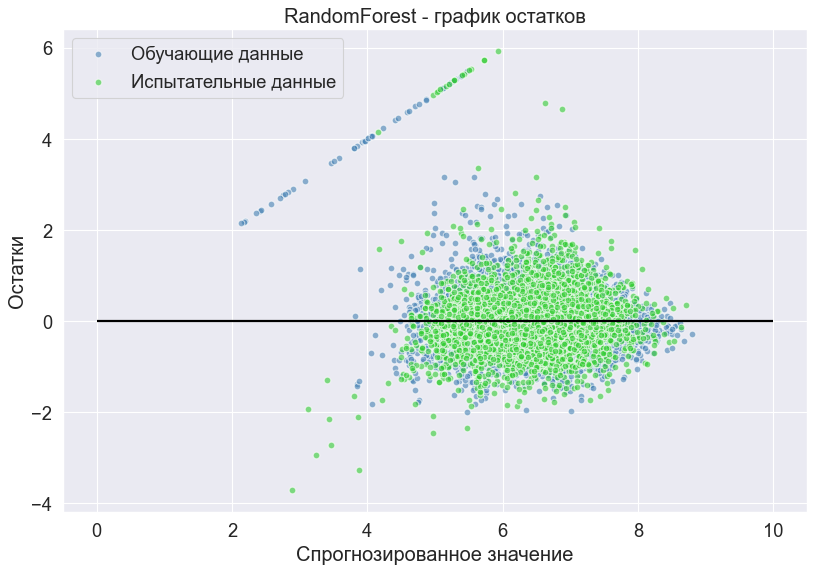

In [29]:
plot_residual(final_rf, 'RandomForest')

#### GradientBoostingRegressor.

In [30]:
gb = GradientBoostingRegressor().fit(score_X_train, score_y_train)

check_R2(gb)

R^2 при обучении: 0.532
R^2 при испытании: 0.504


<div class="alert alert-info" role="alert">
    Градиентный бустинг даже при стартовом обучение даёт неплохой результат и не переобучился.
</div>

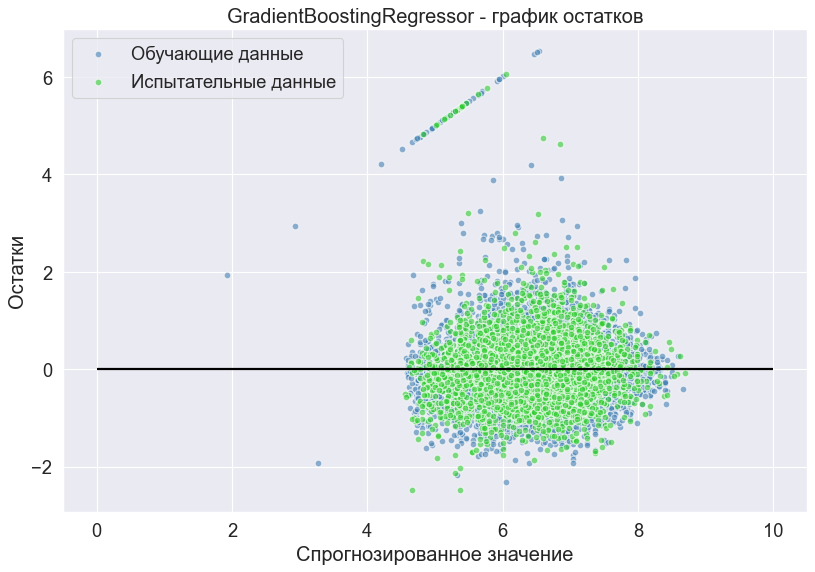

In [31]:
plot_residual(gb, 'GradientBoostingRegressor')

In [32]:
params = {
    'criterion': ['mse'],
    'n_estimators': [9, 100],
    'max_depth': range(1, 10)
}

grid_search = GridSearchCV(GradientBoostingRegressor(), params, cv=10).fit(score_X_train, score_y_train)

In [33]:
grid_search.best_params_

{'criterion': 'mse', 'max_depth': 3, 'n_estimators': 100}

In [34]:
gb = grid_search.best_estimator_
check_R2(gb)

R^2 при обучении: 0.532
R^2 при испытании: 0.504


<div class="alert alert-info" role="alert">
    Решётчетый поиск <b>ничего не изменил.</b>
</div>

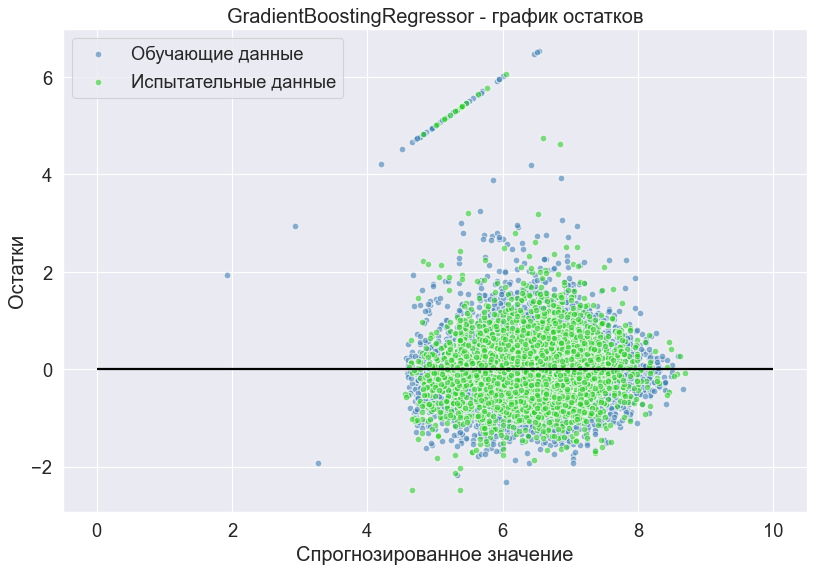

In [35]:
plot_residual(gb, 'GradientBoostingRegressor')

## Итоги разработки Score-модели.

Исходя из различных алгоритмов машинного обучения, мы получили следующее качество моделей:


 * **Регресионная модель =** 0.39 
 * **Случайный лес =** 0.49
 * **Градиентный бустинг =** 0.50
 

**Итог:** модель плохо выполняет прогнозы, внедрять её не стоит.

## Разработка PS-модели.

Теперь мы обучим **класификационную модель,** которая предсказывает успех аниме. 


Здесь уже выбор побольше, однако, из своего опыта, я знаю, что **в коммерческой разработке используют лишь те алгоритмы, которые понятны бизнесу в полной мере, а именно логистическая регрессия и случайный лес,** но бизнеса тут нет, че хочу то и верчу.


**Список алгоритмов:**
  * Логистическая регрессия.
  * Метод опорных векторов.
  * Случайный лес.


**Метрика качества:** ROC-AUC.


**Желаемое значение:** не меньше 0.75

In [36]:
def check_ROC_AUC(clf):
    roc_auc_train = roc_auc_score(success_y_train, clf.predict_proba(success_X_train)[:, 1])
    roc_auc_test = roc_auc_score(success_y_test, clf.predict_proba(success_X_test)[:, 1])
    print(f"ROC-AUC при обучении: {np.round(roc_auc_train, 2)}")
    print(f"ROC-AUC при испытании: {np.round(roc_auc_test, 2)}")  

In [37]:
# Ещё раз взглянем на вид данных.
success_X_train

,rating,studio,kind,main_genre,secondary_genre,year,quarter,planned,status,total_episodes,duration_min
6590,4,56,3,3,-1,2008,4,224,0,6,0
2503,3,14,0,10,33,2003,2,31,0,26,25
6216,4,3,1,10,3,1971,4,88,0,1,18
6914,2,29,2,46,22,2012,4,350,0,10,3
2463,0,172,2,13,46,1991,1,173,0,3,44
...,...,...,...,...,...,...,...,...,...,...,...
5191,2,434,0,32,3,2011,1,6022,0,11,23
13418,4,55,0,10,46,2021,1,313,0,12,2
5390,2,33,2,13,29,2011,4,1163,0,3,39
860,1,1,0,31,13,2006,2,3991,0,11,22


In [38]:
success_y_train

6590     0
2503     0
6216     0
6914     0
2463     0
        ..
5191     1
13418    1
5390     1
860      1
7270     0
Name: success, Length: 9405, dtype: int64

**Примечание:** видно, что наши данные разной масштабности, было бы неплохо применить **стандартизацию.**

#### LogisticRegression.

In [39]:
# Без стандартизации.
log_reg = LogisticRegression().fit(success_X_train, success_y_train)
check_ROC_AUC(log_reg)

ROC-AUC при обучении: 0.84
ROC-AUC при испытании: 0.83


C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<div class="alert alert-info" role="alert">
    Логистическая регрессия без стандартизации выдаёт <b>достаточно хороший результат<b>, наша модель даже <b>не переобучилась.</b>
</div>

In [40]:
# Со стандартизацией.
pipeline_logistic = make_pipeline(StandardScaler(), LogisticRegression()).fit(success_X_train, success_y_train)
check_ROC_AUC(pipeline_logistic)

ROC-AUC при обучении: 0.84
ROC-AUC при испытании: 0.83


<div class="alert alert-info" role="alert">
    Попробуем подобрать гиперпараметры с помощью <b>GridSearchCV</b>, может получится улучшить качество.</b>
</div>

In [41]:
params = {
    'penalty': ['l1', 'l2'],
    'C': [1, 10, 100]
}

grid_search = GridSearchCV(LogisticRegression(), params, cv=10).fit(success_X_train, success_y_train)

C:\Users\evbat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\evbat\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\evbat\anaconda3\lib\site-packages\sklearn\model_selection\_v

C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\evbat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
grid_search.best_params_

{'C': 10, 'penalty': 'l2'}

In [43]:
check_ROC_AUC(grid_search.best_estimator_)

ROC-AUC при обучении: 0.84
ROC-AUC при испытании: 0.83


<div class="alert alert-info" role="alert">
    Ничего не дало.
</div>

#### SVM.

In [44]:
# Без стандартизации.
svc = SVC(probability=True).fit(success_X_train, success_y_train)
check_ROC_AUC(svc)

ROC-AUC при обучении: 0.85
ROC-AUC при испытании: 0.84


In [45]:
# Со стандартизацией.
pipeline_svc = make_pipeline(StandardScaler(), SVC(probability=True)).fit(success_X_train, success_y_train)
check_ROC_AUC(pipeline_svc)

ROC-AUC при обучении: 0.9
ROC-AUC при испытании: 0.88


<div class="alert alert-success" role="alert">
    <b>Качество улучшилось на 4%</b>
</div>

#### RandomForestClassifier.

In [46]:
rfc = RandomForestClassifier().fit(success_X_train, success_y_train)

# Чет он не хочет работать через функцию, распишу вручную.
roc_auc_train = roc_auc_score(success_y_train, rfc.predict_proba(success_X_train)[:, 1])
roc_auc_test = roc_auc_score(success_y_test, rfc.predict_proba(success_X_test)[:, 1])
print(f"ROC-AUC при обучении: {np.round(roc_auc_train, 2)}")
print(f"ROC-AUC при испытании: {np.round(roc_auc_test, 2)}")

ROC-AUC при обучении: 1.0
ROC-AUC при испытании: 0.92


In [47]:
pipe = make_pipeline(StandardScaler(), RandomForestClassifier()).fit(success_X_train, success_y_train)

roc_auc_train = roc_auc_score(success_y_train, pipe.predict_proba(success_X_train)[:, 1])
roc_auc_test = roc_auc_score(success_y_test, pipe.predict_proba(success_X_test)[:, 1])
print(f"ROC-AUC при обучении: {np.round(roc_auc_train, 2)}")
print(f"ROC-AUC при испытании: {np.round(roc_auc_test, 2)}")

ROC-AUC при обучении: 1.0
ROC-AUC при испытании: 0.92


![На случай плохого коэффицента детерминации](../docs/good_roc_auc.png)

#### ROC-кривые.

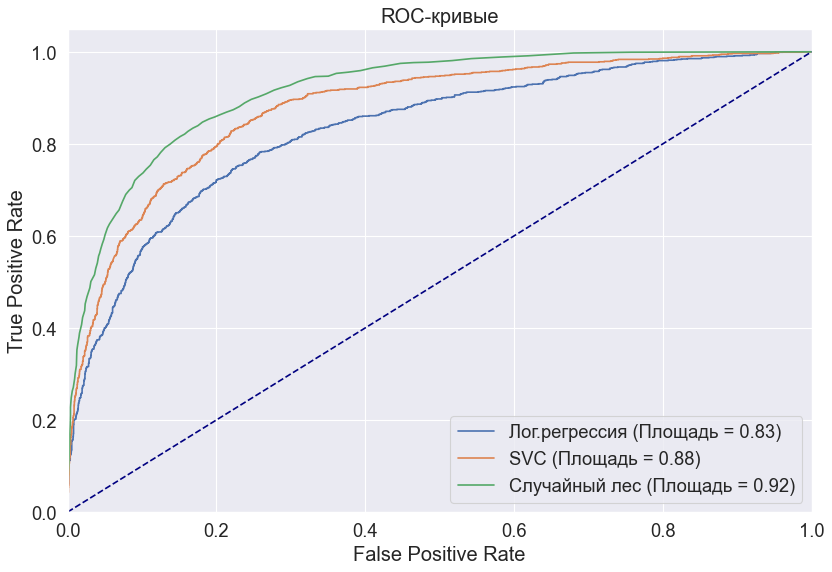

In [48]:
probs = [
    pipeline_logistic.predict_proba(success_X_test)[:, 1],
    pipeline_svc.predict_proba(success_X_test)[:, 1],
    rfc.predict_proba(success_X_test)[:, 1]
]

models_title = ('Лог.регрессия', 'SVC', 'Случайный лес')
figure(figsize=(12, 8), dpi=80)

for i in range(len(models_title)):
    fpr, tpr, thresholds = roc_curve(success_y_test,  probs[i])
    roc_auc= auc(fpr, tpr)
    plt.plot(fpr, tpr,
              label=f'{models_title[i]} (Площадь = %0.2f)' % roc_auc)


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривые')
plt.legend(loc="lower right")
plt.show()

## Итоги разработки PS-модели.

Исходя из различных алгоритмов машинного обучения, мы получили следующее качество моделей:


 * **Логистическая регрессия =** 0.83 
 * **Метод опорных векторов =** 0.88
 * **Случайный лес =** 0.92
 

**Итог:** будем использовать **случайный лес.**

## Импорт модели.

In [49]:
pickle.dump(rfc, open(os.path.join('../pkl/', 'clf.pkl'), 'wb'), protocol=4)